# 📰 Fake News Detection using NLP and Machine Learning
**Semester 6 Project - Enhanced Version**

Created on: 2025-06-01

This notebook detects whether a news article is fake or real using NLP techniques and multiple machine learning models.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##  Load and Merge the Datasets

In [4]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 1
true["label"] = 0

data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data = data[["title", "text", "label"]]
data.dropna(inplace=True)
data.head()

,title,text,label
0,NATIONAL SECURITY ALERT! Obama Administration ...,OUR GOVERNMENT IS GIVING OUT GREEN CARDS LIKE ...,1
1,Danish inventor had murder videos on his compu...,COPENHAGEN (Reuters) - (This October 3 story h...,0
2,BOOM! SENATOR LINDSEY GRAHAM: I Have Reason to...,Senator Lindsey Graham: I have reason to beli...,1
3,Austrian president to insist on pro-EU governm...,VIENNA (Reuters) - Austrian President Alexande...,0
4,(VIDEO) MEDAL OF HONOR RECIPIENT SCORCHES AMER...,Medal of Honor recipient @Dakota_Meyer asking...,1


##  Text Cleaning and Preprocessing with POS Lemmatization

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def wordopt(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
        if word not in stop_words and len(word) > 2
    ]
    return ' '.join(lemmatized)

data["text"] = data["text"].apply(wordopt)
data.head()

,title,text,label
0,NATIONAL SECURITY ALERT! Obama Administration ...,government give green card like candy double r...,1
1,Danish inventor had murder videos on his compu...,copenhagen reuters october story refiled corre...,0
2,BOOM! SENATOR LINDSEY GRAHAM: I Have Reason to...,senator lindsey graham reason believe dnc hill...,1
3,Austrian president to insist on pro-EU governm...,vienna reuters austrian president alexander va...,0
4,(VIDEO) MEDAL OF HONOR RECIPIENT SCORCHES AMER...,medal honor recipient dakotameyer ask stand di...,1


In [6]:
data.shape

(44898, 3)

## 🧾 TF-IDF Vectorization

In [7]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data["text"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Logistic Regression

Accuracy: 0.9870824053452116
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4241
           1       0.99      0.99      0.99      4739

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



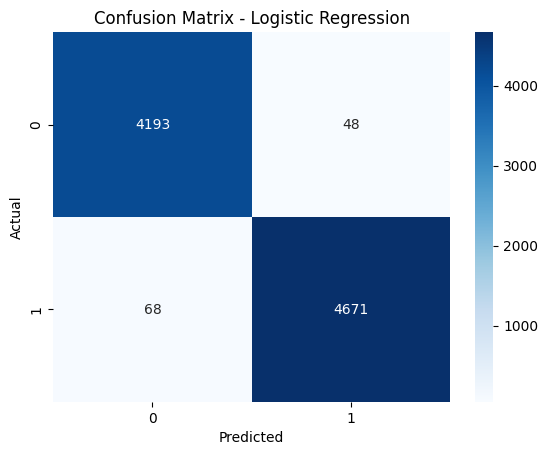

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  Decision Tree

Accuracy: 0.994097995545657
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4241
           1       0.99      1.00      0.99      4739

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



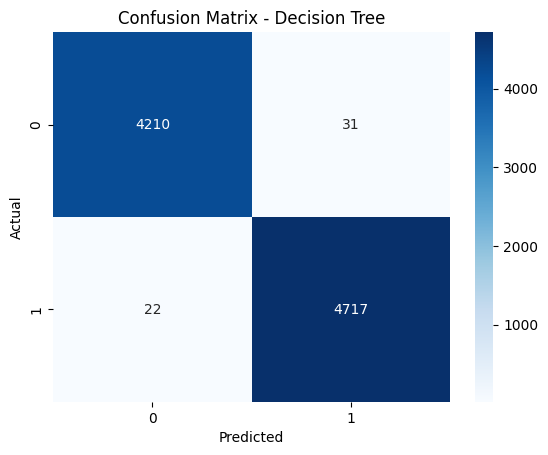

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  Random Forest

Accuracy: 0.9968819599109131
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4241
           1       1.00      1.00      1.00      4739

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



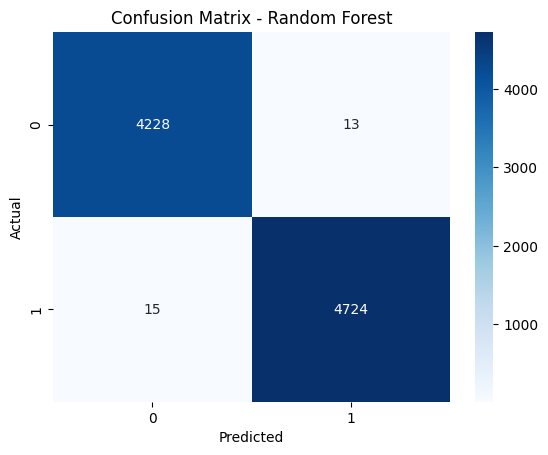

In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  Gradient Boosting

Accuracy: 0.99543429844098
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4241
           1       1.00      0.99      1.00      4739

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



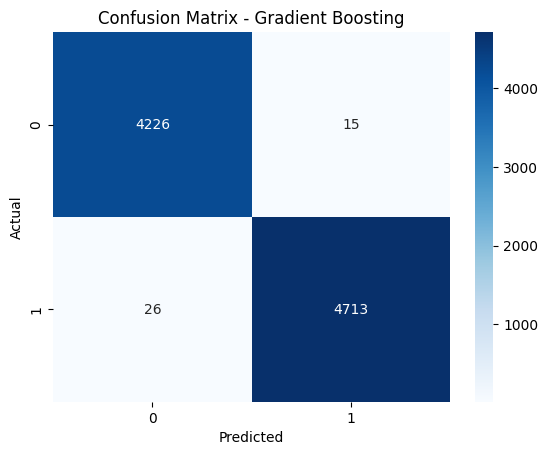

In [11]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##  Manual Testing Function

In [12]:
def manual_test(news):
    cleaned = wordopt(news)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)
    return "Fake News" if pred[0] == 1 else "Real News"

# Example:
manual_test("Prime Minister announces new health scheme today.")

'Fake News'

## ✅ Conclusion and Future Scope
- Successfully built a fake news classifier using NLP and ML.
- POS-based lemmatization improved preprocessing.
- In the future, deep learning models like BERT can be used for better results.
- The project can be deployed using Streamlit or Flask for real-time detection.

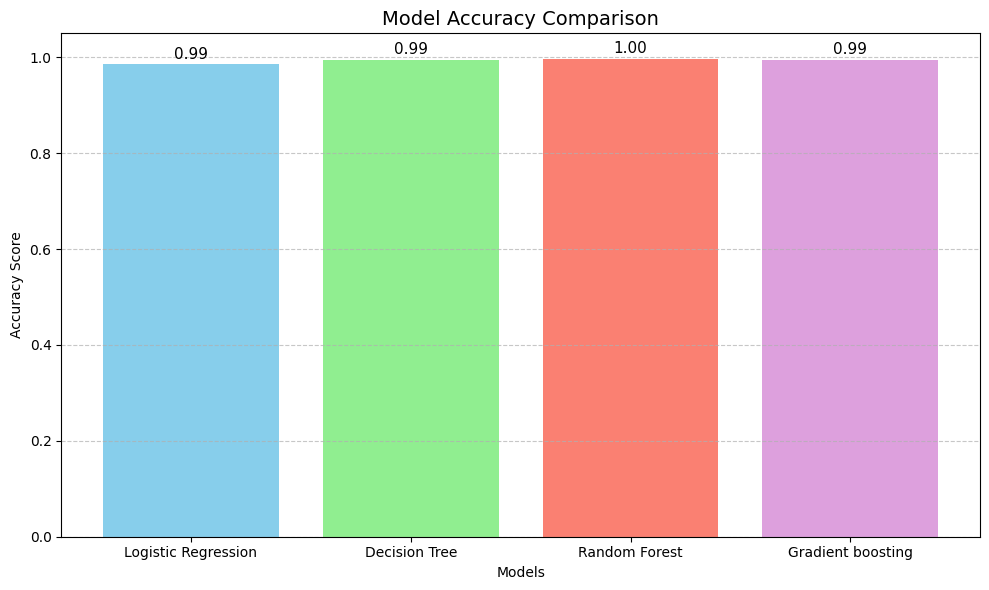

In [13]:
import matplotlib.pyplot as plt

# Example accuracy scores — replace these with your actual results
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient boosting']
accuracies = [0.986, 0.995, 0.997, 0.995]  # Replace with your actual accuracy values

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'plum'])

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=11)

plt.ylim(0, 1.05)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
